# 歡迎來到 **使用 OpenVINO Runtime API (推論引擎)建立影像辨識與物件偵測應用程式!** 課程的編程作業!

你將透過使用OpenVINO 建置, 優化, 部署的步驟打造一個人的物件偵測app<br>
推論結果如下圖所展示

!["intel_ceo_pat"](https://i.imgur.com/oYpAN0E.png)

### Import所需要的函示庫

In [1]:
from openvino.runtime import Core
import matplotlib.pyplot as plt
import numpy as np
import cv2

## 讀取原始影像

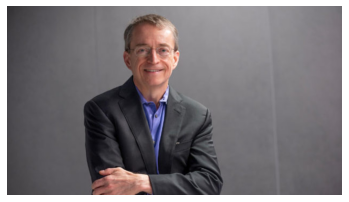

In [2]:
image_path = 'intel_ceo.jpg'

original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.imshow(original_image)
plt.axis("Off")
plt.show()

## 下載模型 - [person-detection](https://docs.openvino.ai/latest/omz_models_model_person_detection_retail_0013.html)

In [3]:
model_name = 'person-detection-retail-0013'
precisions = "FP16"
model_dir = "model"

download_model_cmd = f"omz_downloader " \
                     f"--name {model_name} " \
                     f"--precisions {precisions} " \
                     f"--output_dir {model_dir} " \
                     f"--cache_dir {model_dir}"

! $download_model_cmd

################|| Downloading person-detection-retail-0013 ||################

========== Retrieving model\intel\person-detection-retail-0013\FP16\person-detection-retail-0013.xml from the cache

========== Retrieving model\intel\person-detection-retail-0013\FP16\person-detection-retail-0013.bin from the cache



## 建立Core, 讀取模型, 加載裝置

In [4]:
model_path = f"model/intel/{model_name}/{precisions}/{model_name}.xml"

core = Core()
model = core.read_model(model_path)
compiled_model = core.compile_model(model, 'AUTO')

input_layer = compiled_model.input(0)
n, c, h, w = input_layer.shape

## 讀取影像, 影像前處理

In [5]:
img = cv2.imread(image_path)
img_h, img_w, img_c = img.shape
resized = cv2.resize(img, (w, h))
transposed = resized.transpose((2, 0, 1))
input_tensor = np.expand_dims(transposed, axis=0)

## 建立推論請求, 執行推論

In [6]:
infer_request = compiled_model.create_infer_request()
results = infer_request.infer({0: input_tensor})

## 對推論結果做影像後處理

In [7]:
for res in results.values():
    for obj in res[0][0]:
        conf = obj[2]
        if conf >= 0.08:
            xmin = int(obj[3] * img_w)
            ymin = int(obj[4] * img_h)
            xmax = int(obj[5] * img_w)
            ymax = int(obj[6] * img_h)
            
            drew_image = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 3)

## 顯示推論結果

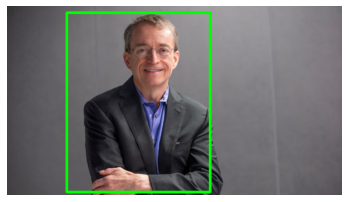

In [8]:
drew_image = cv2.cvtColor(drew_image, cv2.COLOR_BGR2RGB)
plt.imshow(drew_image)
plt.axis("Off")
plt.show()